# Introduction to Torch
- Deep learning library developed by Meta (Formerly Facebook)
- Is a key component of PyTorch ecosystem

Similarities with Autograd:
- Automatic differentiation
- Easy of use
- Pythonic integration
- Dynamic computational graphs
- Gradient computation and optimization

Differences with AutoGrad:
- Based on **tensors** (multidimensional matrixes) instead of **values**
- Easy to execute on GPUs of different vendors
- Lots of components and tools integrated

## A simple example in torch

In [1]:
import torch

x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())

0.7071066904050358


In [2]:
o.backward()

print('x1', x1.grad.item())
print('w1', w1.grad.item())
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('b', b.grad.item())

x1 -1.5000003851533106
w1 1.0000002567688737
x2 0.5000001283844369
w2 0.0
b 0.5000001283844369


## A neural network in torch

In [339]:
xs = torch.tensor([
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
])
ys = torch.tensor([1.0, -1.0, -1.0, 1.0])

In [340]:
# Neuron, three inputs
W = torch.randn((3, 1))
W

tensor([[ 0.5873],
        [-0.3065],
        [-0.9084]])

In [341]:
# activation of the neuron on the four inputs
xs @ W

tensor([[1.1634],
        [1.6141],
        [0.8955],
        [1.1891]])

In [342]:
# Lets now add the bias
b = torch.randn((1,))
b

tensor([1.6956])

In [343]:
# activation of the first neuron for the four inputs
xs @ W + b

tensor([[2.8590],
        [3.3097],
        [2.5911],
        [2.8848]])

In [344]:
# lets add more neurons
W = torch.randn((3, 4))
W

tensor([[ 0.7701,  0.8489,  1.3302,  0.0665],
        [-0.1748,  1.2672,  1.6503,  0.7034],
        [-0.6673, -0.4900, -0.7401,  0.9319]])

In [345]:
# what is now the product?
xs @ W

tensor([[ 1.6830,  5.9892,  8.3515,  1.3113],
        [ 2.1515,  1.0344,  1.9704, -0.0379],
        [ 0.8775,  2.1816,  3.0555, -0.1953],
        [ 1.2625,  2.6060,  3.7207, -0.1620]])

In [346]:
# xs -> objects x features
# W -> weights x neurons
# xs @ W -> objects x neurons, each cell contains sum(features*weights)
xs.shape, W.shape, (xs@W).shape

(torch.Size([4, 3]), torch.Size([3, 4]), torch.Size([4, 4]))

In [347]:
# the bias is added per neuron, after xs * W
b = torch.randn((1,4))
act = xs @ W + b
display(xs @ W)
display(b)
display(act)

tensor([[ 1.6830,  5.9892,  8.3515,  1.3113],
        [ 2.1515,  1.0344,  1.9704, -0.0379],
        [ 0.8775,  2.1816,  3.0555, -0.1953],
        [ 1.2625,  2.6060,  3.7207, -0.1620]])

tensor([[-0.6787, -1.8169,  0.9257, -0.9817]])

tensor([[ 1.0043,  4.1723,  9.2772,  0.3296],
        [ 1.4728, -0.7826,  2.8961, -1.0196],
        [ 0.1988,  0.3646,  3.9813, -1.1770],
        [ 0.5839,  0.7891,  4.6464, -1.1437]])

In [348]:
# now, it is time to evaluate the activation function on the activation
(xs @ W + b).tanh()

tensor([[ 0.7634,  0.9995,  1.0000,  0.3182],
        [ 0.9001, -0.6542,  0.9939, -0.7697],
        [ 0.1962,  0.3493,  0.9993, -0.8265],
        [ 0.5255,  0.6579,  0.9998, -0.8157]])

As a summary, a fully connected layer is formed by:
- A weight matrix that has one row per input value, and a column per output value
- A bias vector, that has a single row and a column per neuron
- An activation function

Note: All the elements here are differentiable.

In [349]:
# back to the original problem
display(xs)
display(ys)

tensor([[ 2.0000,  3.0000, -1.0000],
        [ 3.0000, -1.0000,  0.5000],
        [ 0.5000,  1.0000, -1.0000],
        [ 1.0000,  1.0000, -1.0000]])

tensor([ 1., -1., -1.,  1.])

In [350]:
# we have three objects and one output, so we need one output neuron
W = torch.randn((3, 1))
b = torch.randn((1, 1))

out = (xs @ W + b).tanh()
out

tensor([[-0.9999],
        [-0.8943],
        [-0.9755],
        [-0.9899]])

In [351]:
# lets calculate the loss
loss = torch.sum((out - ys)**2)
loss

tensor(30.9246)

In [352]:
# Uppps, it should not be that large!
out-ys

tensor([[-1.9999e+00,  5.0724e-05,  5.0724e-05, -1.9999e+00],
        [-1.8943e+00,  1.0574e-01,  1.0574e-01, -1.8943e+00],
        [-1.9755e+00,  2.4481e-02,  2.4481e-02, -1.9755e+00],
        [-1.9899e+00,  1.0087e-02,  1.0087e-02, -1.9899e+00]])

In [353]:
out.shape, ys.shape, (out-ys).shape

(torch.Size([4, 1]), torch.Size([4]), torch.Size([4, 4]))

In [354]:
# one solution is remove the last dimension from out
out.shape, out.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

In [355]:
out.squeeze() - ys

tensor([-1.9999,  0.1057,  0.0245, -1.9899])

In [356]:
loss = torch.sum((out.squeeze() - ys)**2)
loss

tensor(7.9713)

In [357]:
# since everything is differentiable, we can backpropagate the loss
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [358]:
# In torch, we need to warn the framework about the tensors we need to calculate the grad

# network definition, seed controled
g = torch.Generator().manual_seed(31416)
W = torch.randn((3, 1), generator=g, requires_grad=True)
b = torch.randn((1, 1), generator=g, requires_grad=True)

In [359]:
learning_rate = 0.1
for _ in range(100):
    # forward pass
    out = (xs @ W + b).tanh()
    loss = torch.mean((out.squeeze() - ys)**2)
#     print(loss.item())

    # backward pass, need to remove the gradients
    W.grad = None
    b.grad = None
    loss.backward()

    # update parameters
    W.data += -learning_rate * W.grad
    b.data += -learning_rate * b.grad
print("Final loss:", loss.item())

Final loss: 0.5335512161254883


In [360]:
out.data, ys

(tensor([[ 0.8151],
         [-0.7351],
         [ 0.0957],
         [ 0.0894]]),
 tensor([ 1., -1., -1.,  1.]))

In [448]:
g = torch.Generator().manual_seed(31416)
W = torch.randn((3, 1), generator=g, requires_grad=True)
b = torch.randn((1, 1), generator=g, requires_grad=True)

In [515]:
# Let simplify the code
learning_rate = 0.1
parameters = [W, b]
for _ in range(100):
    # forward pass
    out = (xs @ W + b).tanh()
    loss = torch.mean((out.squeeze() - ys)**2)
#     print(loss.item())

    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
        
print("Final loss:", loss.item())


Final loss: 0.02031448297202587


In [516]:
out.data, ys

(tensor([[ 1.0000],
         [-0.9322],
         [-0.8020],
         [ 0.8064]]),
 tensor([ 1., -1., -1.,  1.]))

## Solving moon problem

In [284]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(1337)
random.seed(1337)

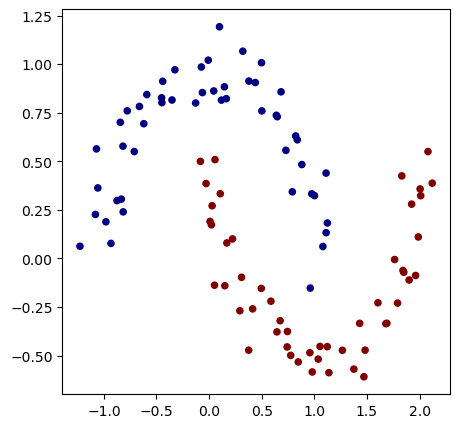

In [517]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()

In [530]:
# Lets transform them to tensors, and keep only the first to simplify the explanations
xs = torch.tensor(X, dtype=torch.float32)[:5]
ys = torch.tensor(y)[:5]
xs.shape, ys.shape

(torch.Size([5, 2]), torch.Size([5]))

In [531]:
xs, ys

(tensor([[-0.0082,  1.0205],
         [ 0.9575, -0.4847],
         [ 0.6388,  0.7369],
         [ 2.1202,  0.3876],
         [ 1.4710, -0.6086]]),
 tensor([0, 1, 0, 1, 1]))

In [521]:
# Now, lets create a neural network having two hidden layers, with 4 and 5 neurons
# Since it is a classification problem, we will use one output layer per class.

In [532]:
g = torch.Generator().manual_seed(31416+2)
W1 = torch.randn((2, 4), generator=g, requires_grad=True)
b1 = torch.randn((1, 4), generator=g, requires_grad=True)

W2 = torch.randn((4, 5), generator=g, requires_grad=True)
b2 = torch.randn((1, 5), generator=g, requires_grad=True)

W3 = torch.randn((5, 2), generator=g, requires_grad=True)
b3 = torch.randn((1, 2), generator=g, requires_grad=True)

parameters = [W1, b1, W2, b2, W3, b3]

In [536]:
# forward pass
l1_out = (xs @ W1 + b1).tanh()
l2_out = (l1_out @ W2 + b2).tanh()
l3_out = (l2_out @ W3 + b3)
l3_out

tensor([[-2.8111e+00, -3.4916e-01],
        [ 1.7759e-03, -2.9103e+00],
        [-1.7438e+00, -1.9053e+00],
        [-3.5439e-02, -2.9181e+00],
        [ 8.5722e-02, -2.9523e+00]], grad_fn=<AddBackward0>)

We want the output of the network to be class probabilities, so we need to transform the outputs. To be considered as a probability, values must between 0 and 1, and they must add to 1.

First, lets apply the exponencial function, to turn all values positive.

In [537]:
l3_out.exp()

tensor([[0.0601, 0.7053],
        [1.0018, 0.0545],
        [0.1748, 0.1488],
        [0.9652, 0.0540],
        [1.0895, 0.0522]], grad_fn=<ExpBackward0>)

Now, re-scale the values so they add 1

In [558]:
value = l3_out.exp()
(value / value.sum(dim=1)).data

RuntimeError: The size of tensor a (2) must match the size of tensor b (5) at non-singleton dimension 1

In [552]:
# Lets explore the cause of the error
value.shape, value.sum(dim=1).shape

(torch.Size([5, 2]), torch.Size([5]))

The problem happens because of the way broadcast is performed:
- Align the dimension from right to left
- Fill missing dimensions with 1
- Dimensions are compatible if they have the same size, or all but one contains value 1
- Broadcast the values in the values in the vector with 1 as necessary

Examples:
- 5x1, 1x5 -> 5x5
- 6x3, 3 -> 6x3 , 1x3 -> 6x3

In the line with the error, torch try to broadcast 5x2 and 5 -> 5x2, 1x5, and they are not compatible.

There are some solutions. Here we use the unsqueeze() method that adds a dimension to the tensor, in the **dim** position.

In [721]:
value = l3_out.exp()
probs = (value / value.sum(dim=1).unsqueeze(dim=1))
probs[:5]

tensor([[0.8749, 0.1251],
        [0.8736, 0.1264],
        [0.8686, 0.1314],
        [0.7781, 0.2219],
        [0.1314, 0.8686]], grad_fn=<SliceBackward0>)

In [562]:
# Safety check
probs.sum(dim=1)

tensor([1., 1., 1., 1., 1.])

Now we have probabilities as the output of the network. How to create a loss function, using this probabilities.

One commonly used idea is to use the maximal likelihood estimation. It estimates the quality of the result by multiplying the probabilities obtained for the correct class.

In [563]:
display(probs)
ys

tensor([[0.0786, 0.9214],
        [0.9484, 0.0516],
        [0.5403, 0.4597],
        [0.9470, 0.0530],
        [0.9543, 0.0457]])

tensor([0, 1, 0, 1, 1])

In [565]:
# In our case
probs[0, 0], probs[1, 1], probs[2, 0], probs[3, 1], probs[4,1]

(tensor(0.0786),
 tensor(0.0516),
 tensor(0.5403),
 tensor(0.0530),
 tensor(0.0457))

In [568]:
# How to obtain this probabilities using tensor manipulation: using a type of indexing
probs[torch.arange(len(ys)), ys]

tensor([0.0786, 0.0516, 0.5403, 0.0530, 0.0457])

In [572]:
# lets multiply them
likelihood = probs[torch.arange(len(ys)), ys].prod()
likelihood

tensor(5.3071e-06)

This is a quite small number, and we only have 5 results ... imagine when we have 100s

Solution, use the logarithms, and average the results

In [576]:
log_likelihood = probs[torch.arange(len(ys)), ys].log().mean()
log_likelihood

tensor(-2.4293)

Since likelihood is higher (so log_likelihood) in better results, and we need a loss function, we will invert the sign.

**Note:** All performed operations are derivables!

In [579]:
nll = - log_likelihood
nll

tensor(2.4293)

Lets put it all together

In [581]:
xs = torch.tensor(X, dtype=torch.float32)
ys = torch.tensor(y)

In [704]:
g = torch.Generator().manual_seed(31416+2)
W1 = torch.randn((2, 4), generator=g, requires_grad=True)
b1 = torch.randn((1, 4), generator=g, requires_grad=True)

W2 = torch.randn((4, 5), generator=g, requires_grad=True)
b2 = torch.randn((1, 5), generator=g, requires_grad=True)

W3 = torch.randn((5, 2), generator=g, requires_grad=True)
b3 = torch.randn((1, 2), generator=g, requires_grad=True)

parameters = [W1, b1, W2, b2, W3, b3]

In [705]:
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    # forward pass
    l1_out = (xs @ W1 + b1).tanh()
    l2_out = (l1_out @ W2 + b2).tanh()
    l3_out = (l2_out @ W3 + b3).tanh()
    value = l3_out.exp()
    probs = (value / value.sum(dim=1).unsqueeze(dim=1))
    log_likelihood = probs[torch.arange(len(ys)), ys].log().mean()
    loss = -log_likelihood
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
print(loss.item())

Epoch 0, loss=0.9150870442390442
Epoch 1000, loss=0.3188113868236542
Epoch 2000, loss=0.2514873445034027
Epoch 3000, loss=0.1349702924489975
Epoch 4000, loss=0.12973123788833618
Epoch 5000, loss=0.12851276993751526
Epoch 6000, loss=0.12800560891628265
Epoch 7000, loss=0.1277344673871994
Epoch 8000, loss=0.12756778299808502
Epoch 9000, loss=0.12745577096939087
0.1273757964372635


In [707]:
# Lets calculate the classifier accuracy
probs[torch.arange(len(ys)), ys] > 0.5

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

The classifier commits no mistakes, so it's accuracy is 1.0. 

Lets plot the decision boundary

In [710]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
Xmesh[:10]

array([[-2.2273091 , -1.60864877],
       [-1.9773091 , -1.60864877],
       [-1.7273091 , -1.60864877],
       [-1.4773091 , -1.60864877],
       [-1.2273091 , -1.60864877],
       [-0.9773091 , -1.60864877],
       [-0.7273091 , -1.60864877],
       [-0.4773091 , -1.60864877],
       [-0.2273091 , -1.60864877],
       [ 0.0226909 , -1.60864877]])

In [715]:
xs_full = torch.tensor(Xmesh).float()
l1_out = (xs_full @ W1 + b1).tanh()
l2_out = (l1_out @ W2 + b2).tanh()
l3_out = (l2_out @ W3 + b3).tanh()
value = l3_out.exp()
probs = (value / value.sum(dim=1).unsqueeze(dim=1))
probs[:5]

tensor([[0.8749, 0.1251],
        [0.8736, 0.1264],
        [0.8686, 0.1314],
        [0.7781, 0.2219],
        [0.1314, 0.8686]], grad_fn=<SliceBackward0>)

In [718]:
scores = torch.max(probs, dim=1).indices
scores

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(-1.6086487731450796, 2.1413512268549204)

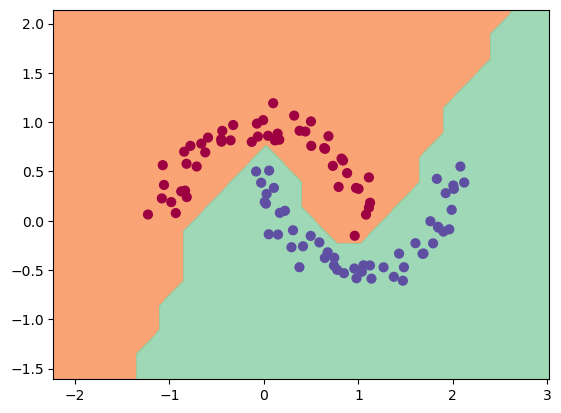

In [720]:
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [746]:
xs = torch.tensor(X, dtype=torch.float32)
ys = torch.tensor(y)

g = torch.Generator().manual_seed(31416+2)
W1 = torch.randn((2, 4), generator=g, requires_grad=True)
b1 = torch.randn((1, 4), generator=g, requires_grad=True)

W2 = torch.randn((4, 5), generator=g, requires_grad=True)
b2 = torch.randn((1, 5), generator=g, requires_grad=True)

W3 = torch.randn((5, 2), generator=g, requires_grad=True)
b3 = torch.randn((1, 2), generator=g, requires_grad=True)

In [747]:
# fully connected layers
l1_out = (xs @ W1 + b1).tanh()
l2_out = (l1_out @ W2 + b2).tanh()
l3_out = (l2_out @ W3 + b3).tanh()

# soft-max layer
value = l3_out.exp()
probs = (value / value.sum(dim=1).unsqueeze(dim=1))

# entropy loss
log_likelihood = probs[torch.arange(len(ys)), ys].log().mean()
loss = -log_likelihood

tensor(0.9151, grad_fn=<NegBackward0>)

In [758]:
import torch.nn as nn

# Using torch fully connected layers
l1 = nn.Linear(in_features=2, out_features=4)
l2 = nn.Linear(in_features=4, out_features=5)
l3 = nn.Linear(in_features=5, out_features=2)

x = l1(xs).tanh()
x = l2(x).tanh()
x = l3(x).tanh()

# soft-max layer + entropy loss = cross_entropy
loss = F.cross_entropy(x, ys)

tensor(0.7332, grad_fn=<NllLossBackward0>)

In [764]:
# train the network
xs = torch.tensor(X, dtype=torch.float32)
ys = torch.tensor(y)

l1 = nn.Linear(in_features=2, out_features=4)
l2 = nn.Linear(in_features=4, out_features=5)
l3 = nn.Linear(in_features=5, out_features=2)
parameters = list(l1.parameters()) + list(l2.parameters()) + list(l3.parameters())

In [767]:
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    
    # forward pass
    x = l1(xs).tanh()
    x = l2(x).tanh()
    x = l3(x).tanh()
    loss = F.cross_entropy(x, ys)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, loss={loss.item()}")
    
    # backward pass, need to remove the gradients
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parameters
    for p in parameters:
        p.data += -learning_rate * p.grad
        
print(loss.item())

Epoch 0, loss=0.12715943157672882
Epoch 1000, loss=0.12714418768882751
Epoch 2000, loss=0.1271306723356247
Epoch 3000, loss=0.12711863219738007
Epoch 4000, loss=0.12710784375667572
Epoch 5000, loss=0.12709812819957733
Epoch 6000, loss=0.12708930671215057
Epoch 7000, loss=0.12708130478858948
Epoch 8000, loss=0.12707401812076569
Epoch 9000, loss=0.12706734240055084
0.12706118822097778
